# **1. Setting Up**

## **1.1. Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1.2. Loading the dataset** 

In [ ]:
path = '/content/drive/MyDrive/Project/SeoulBikeData.csv'
df = pd.read_csv(path,encoding= 'unicode_escape')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **2. Understanding the dataset**

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 **The dataset is clean with no null values and not duplicate values**

### The dataset contains the following variables:

**Date:** The date of the observation.

**Hour:** The hour of the observation.

**Temperature:** The temperature at the time of the observation.

**Hour of the day:** The hour of the day on a scale of 0 to 23.

**Humidity:** The humidity at the time of the observation in %.

**Windspeed:** The windspeed at the time of the observation in m/s.

**Visibility:** The visibility at the time of the observation in 10m.

**Dew Point Temperature:** The dew point temperature at the time of the observation in °C.

**Solar Radiation:** The solar radiation at the time of the observation in MJ/m2.

**Rainfall:** The amount of rainfall at the time of the observation, measured in mm.

**Snowfall:** The amount of snowfall at the time of the observation, measured in cm.

**Seasons:** The season at the time of the observation.

**Holiday:** A binary variable indicating whether the observation occurred on a holiday or not.

**Functional Day:** A binary variable indicating whether the observation was a functional day or not.

# **3. Data Wrangling**

In [ ]:
# Converting the 'date' column into two separate ones - 'Day', 'Month', and 'Day of the Week'
import datetime as dt
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day of the week'] = df['date'].dt.day_name()

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date,Month,Day,Day of the week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday


# **4. Data Visualization**

## **4.1. Count of Rented Bikes month wise**

In [ ]:
# Chart - 1: Count of Rented bikes acording to Month

# Pivot Table showing the variation of count of rented bikes monthwise
bike_month = pd.pivot_table(df,values='Rented Bike Count', index='month', aggfunc='sum')
bike_month

,Rented Bike Count
month,
1,150006
2,151833
3,380594
4,524227
5,707088
6,896887
7,734460
8,651887
9,673612


[Text(0, 200000, '200K'),
 Text(0, 400000, '400K'),
 Text(0, 600000, '600K'),
 Text(0, 800000, '800K')]

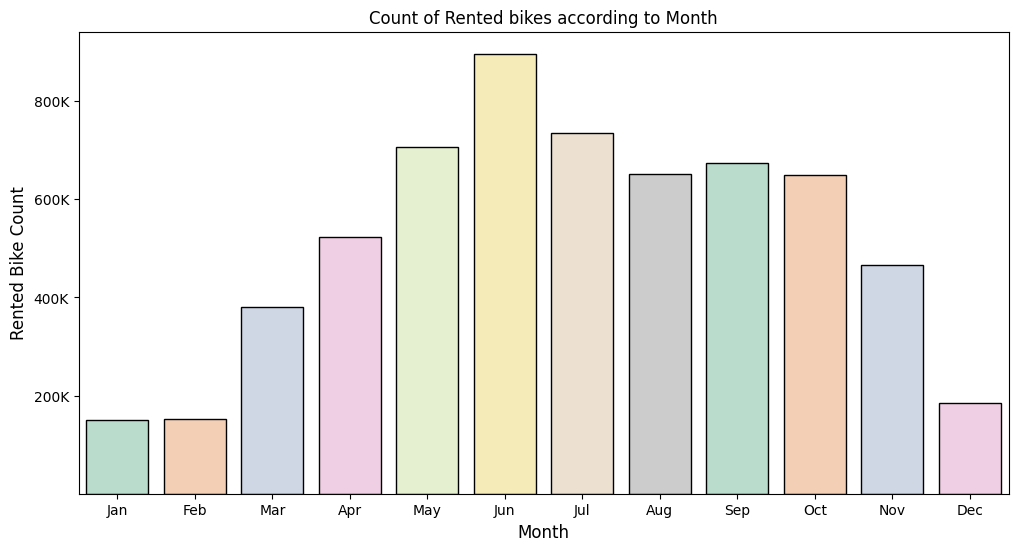

In [ ]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(12, 6))

#Changing the colors of the bars
color = sns.color_palette('Pastel2')

sns.barplot(data=bike_month, x=list(bike_month.index), y='Rented Bike Count', palette=color, edgecolor='black', errorbar=None)
ax.set(title='Count of Rented bikes according to Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Setting the axes titles
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Rented Bike Count', fontsize=12)

# Changing y-tick labels
ytick_labels = ['200K', '400K', '600K', '800K']
ytick_values = [200000, 400000, 600000, 800000]
ax.set_yticks(ytick_values)
ax.set_yticklabels(ytick_labels)

The insight found from the bar chart showing the variation of rented bike count monthwise is that the number of rented bikes is lowest during winters (December to February) and highest in June. This indicates a seasonal pattern in the bike rental business, with demand for rented bikes being lower in the colder months and higher in the summer months.

## **4.2. Weekly variation in rented bikes**

In [ ]:
# Chart - 2: Variation of rented bikes day wise.

# Pivoting the dataframe
bike_day = pd.pivot_table(df, values='Rented Bike Count', index='day', aggfunc='sum')

# Defining the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordering the index labels
bike_day = bike_day.reindex(weekday_order)
bike_day

,Rented Bike Count
day,
Monday,911743
Tuesday,858596
Wednesday,923956
Thursday,861999
Friday,950334
Saturday,885492
Sunday,780194


[Text(0, 200000, '200K'),
 Text(0, 400000, '400K'),
 Text(0, 600000, '600K'),
 Text(0, 800000, '800K')]

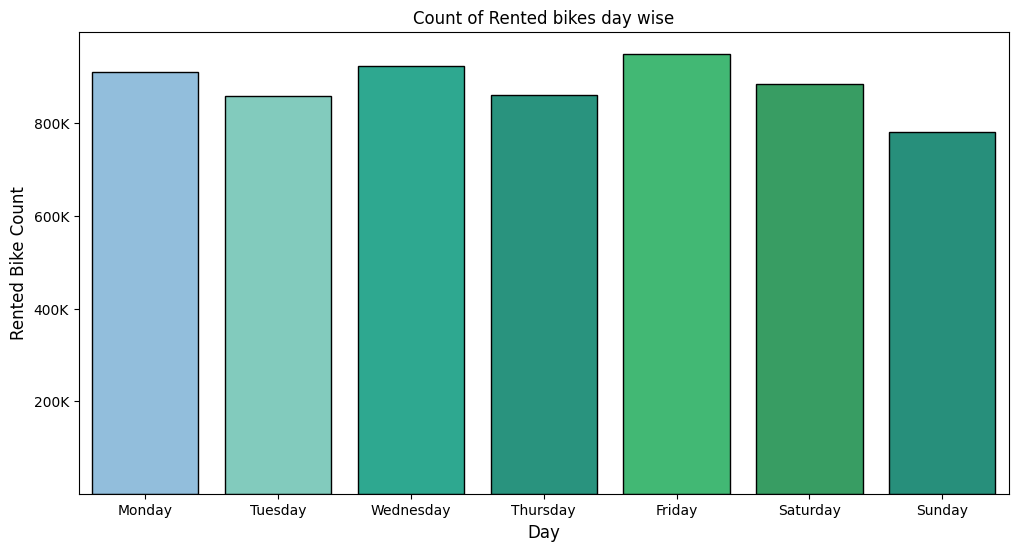

In [ ]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(12, 6))

# Changing the colors of the bars
colors = ['#85c1e9', '#76d7c4','#1abc9c', '#17a589','#2ecc71', '#27ae60', '#16a085']

sns.barplot(data=bike_day, x=list(bike_day.index), y='Rented Bike Count',palette=colors, edgecolor='black', errorbar=None)
ax.set(title='Count of Rented bikes day wise')

# Setting the axes titles
ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Rented Bike Count', fontsize=12)

# Changing y-tick labels
ytick_labels = ['200K', '400K', '600K', '800K']
ytick_values = [200000, 400000, 600000, 800000]
ax.set_yticks(ytick_values)
ax.set_yticklabels(ytick_labels)

The insights found from the chart of the variation of the number of rented bikes day-wise for the Bikesharing dataset are that the number of rented bikes is consistent from Monday to Friday and slightly lower on the weekends. This suggests a potential relationship between the availability of bikes and the demand for them on weekdays versus weekends. Additionally, the fact that there is not much difference between the most and least number of rented bikes throughout the week indicates that the demand for rented bikes is relatively stable. This information could be useful for planning purposes, as it suggests that bike rental companies may not need to adjust their offerings significantly from day to day.

## **4.3. Hourly Fluctuations in bike rentals**

In [ ]:
# Chart 3: Hourly Fluctuations in Bike Rentals

# Pivoting the dataframe
bike_hour = pd.pivot_table(df, values='Rented Bike Count', index='Hour', aggfunc='sum')
bike_hour.head()

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396


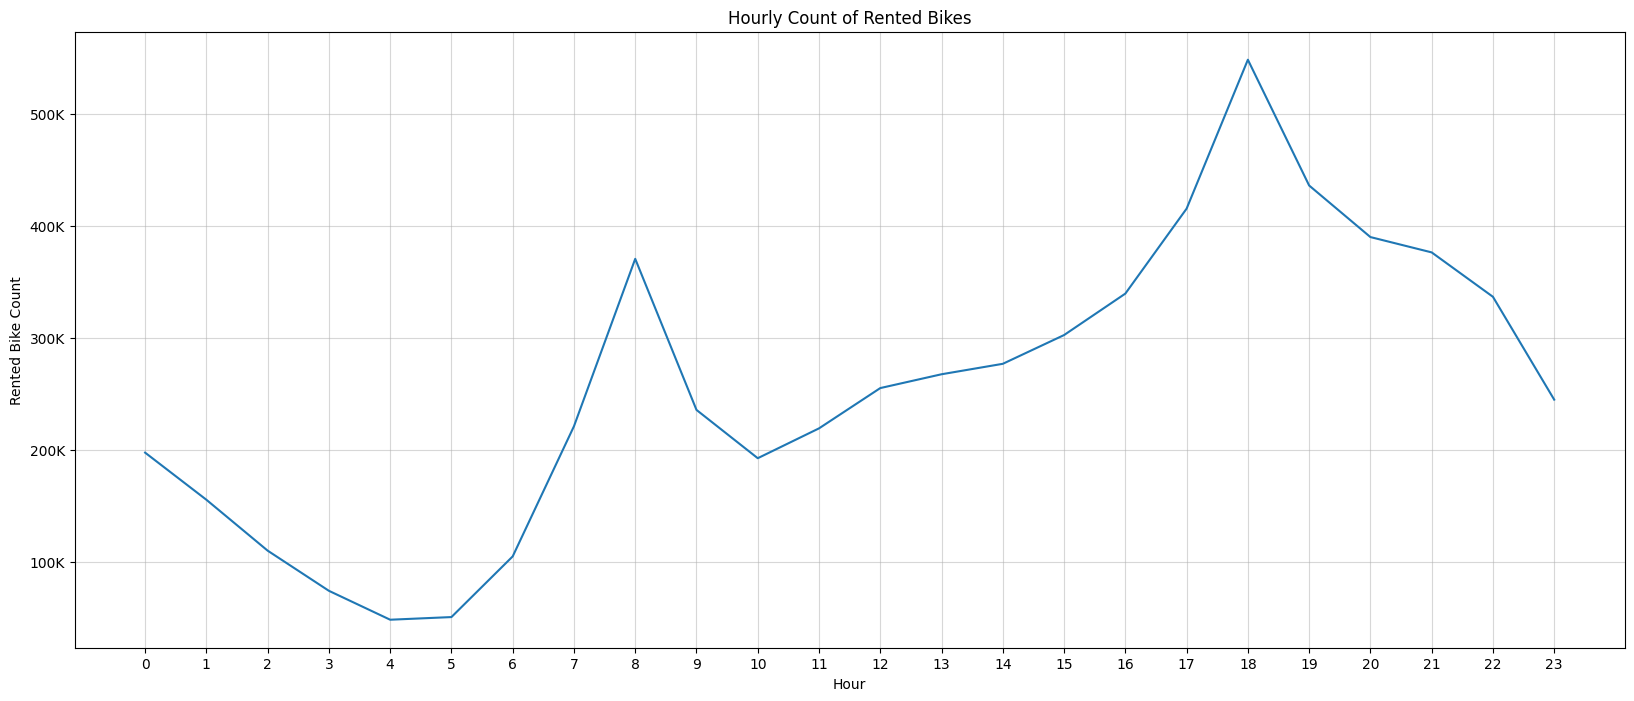

In [ ]:
# Visualizing the table

bike_hour.plot(figsize=(20, 8), legend=None)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hourly Count of Rented Bikes')
plt.yticks([100000, 200000, 300000, 400000, 500000], ['100K', '200K', '300K', '400K', '500K'])
plt.grid(alpha=0.5)
plt.show()

The insight found from the chart is that there are two peaks in the hourly count of rented bikes, one at 8 am and one at 6 pm, which may be due to office goers. The minimum count of rented bikes occurs at 4 am, while the maximum count occurs at 6 pm. These insights suggest that there are specific times of the day when the demand for rented bikes is higher, and that this demand is likely driven by people's work schedules.

## **4.4. Seasonal Variation in rented bikes**

In [ ]:
# Chart - 4: Pie Chart showing number of bikes rented during different seasons

# Pivoting the dataframe
bike_season = pd.pivot_table(df, values='Rented Bike Count', index='Seasons', aggfunc='sum')
bike_season.head()

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


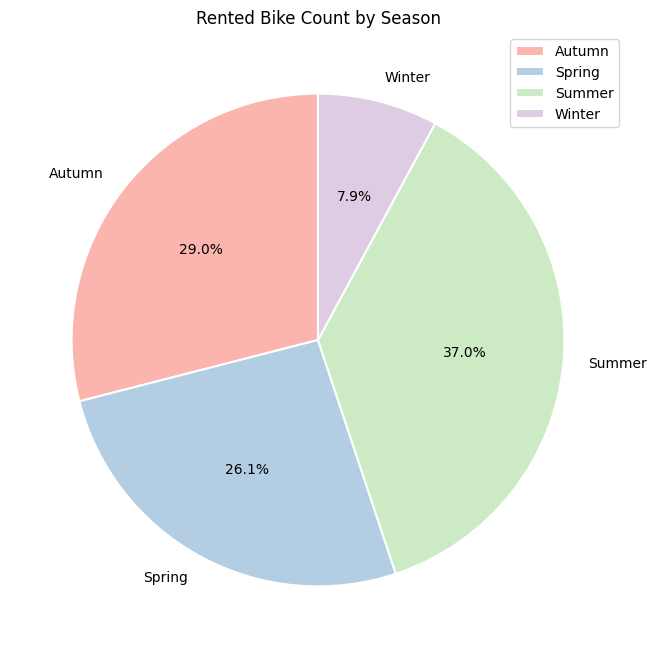

In [ ]:
# Creating a list of colors for the pie chart
colors = sns.color_palette('Pastel1')

# Creating a pie chart
bike_season.plot(kind='pie', y='Rented Bike Count', labels=bike_season.index, colors=colors, autopct='%1.1f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, startangle=90, figsize=(20,8))

# Adding a title to the pie chart
plt.title('Rented Bike Count by Season')

# Removing the y-label
plt.ylabel('')

# Displaying the pie chart
plt.show()

From the pie chart, we can see that summer has the highest percentage of rented bikes, accounting for over 37% of the total count. Autumn is the second highest with 29%, followed by spring with 26%. Winter has the lowest percentage of rented bikes, accounting for only 7.9% of the total count. This suggests that the demand for rented bikes is highest during the summer season, which could be due to various reasons such as pleasant weather and summer vacations. Conversely, the low demand for rented bikes during the winter season could be attributed to colder temperatures and less favorable weather conditions. Overall, the chart gives us a quick and easy way to compare the percentage of rented bikes across the four seasons and draw insights from the data.

## **4.5. Histogram showing rented bikes vs Temperature**

In [ ]:
# Chart 5:  Histogram depicting the distribution of bikes rented as per the varying temperatures

bike_temp = pd.pivot_table(df, values='Rented Bike Count', index='Temperature(°C)', aggfunc='sum')
bike_temp

,Rented Bike Count
Temperature(°C),
-17.8,322
-17.5,291
-17.4,64
-16.9,36
-16.5,96
...,...
38.0,1184
38.7,475
39.0,1033


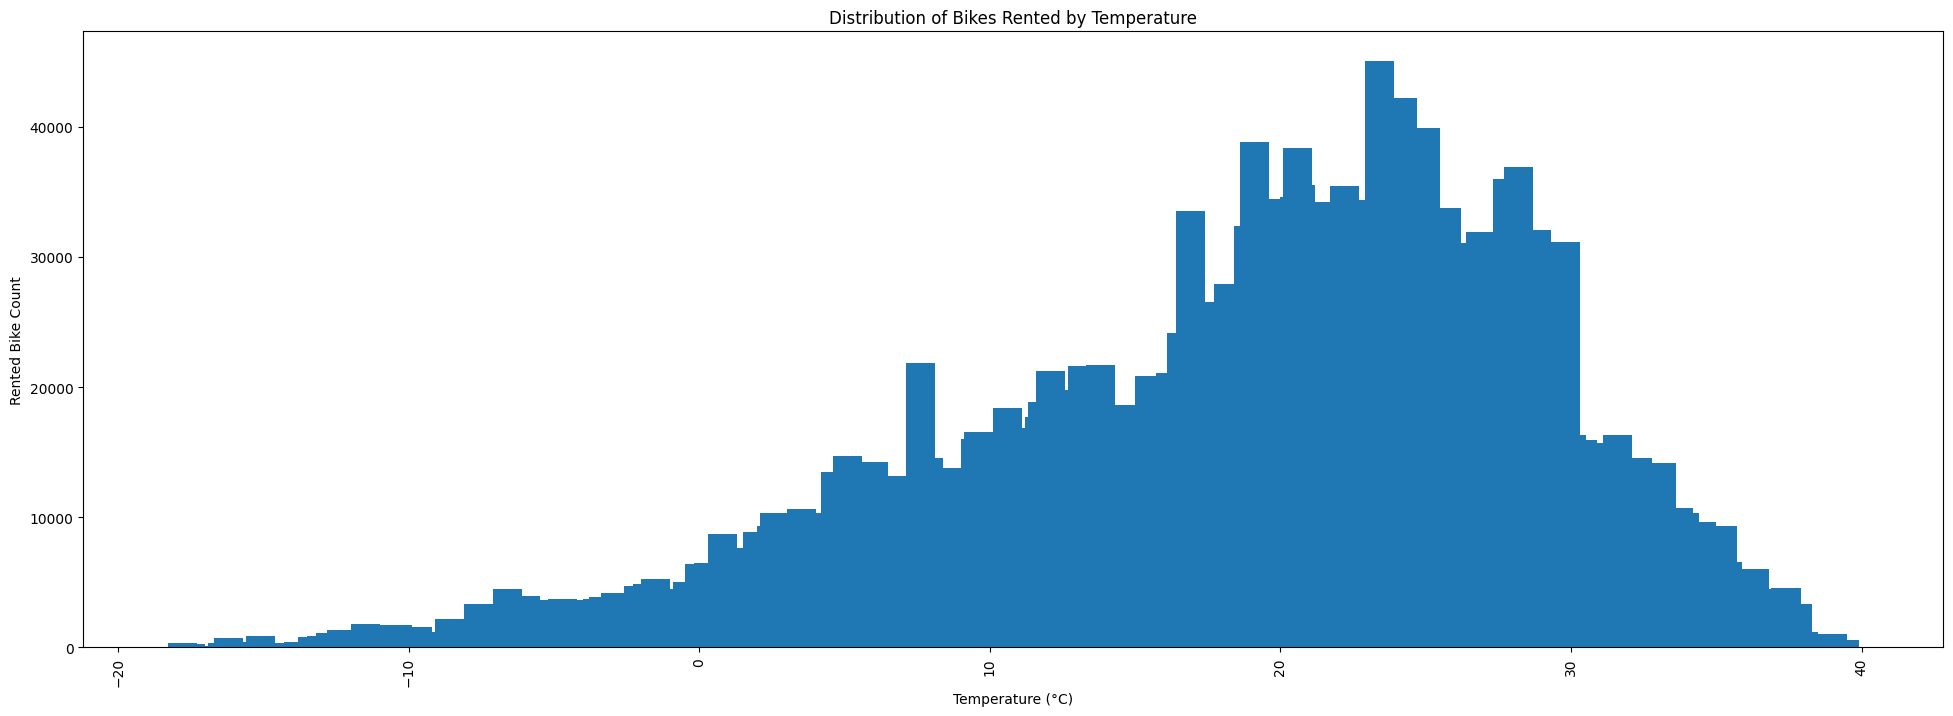

In [ ]:
# Creating a histogram to visualize above table

# Setting figure size
fig, ax = plt.subplots(figsize=(24, 8))
ax.bar(bike_temp.index, bike_temp['Rented Bike Count'], width=1)

# Adding labels and title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Rented Bike Count')
ax.set_title('Distribution of Bikes Rented by Temperature')

# Rotating x-axis labels
ax.tick_params(axis='x', labelrotation=90)

# Displaying the plot
plt.show()

The minimum number of bikes rented occurred at extreme temperatures of -20°C and 40°C. This indicates that weather conditions that are too cold or too hot may not be conducive to biking and can result in a lower demand for rented bikes.

There is a general upward trend in the number of bikes rented as the temperature increases, reaching a peak at around 25°C. This suggests that mild temperatures are the most favorable for bike rentals, and as the temperature gets too hot or too cold, the demand for rented bikes decreases.

Overall, the histogram shows that temperature has a significant impact on the demand for rented bikes, with mild temperatures being the most favorable for bike rentals.

## **4.6. Daily variation in rented bikes**

In [ ]:
bike_daily = pd.pivot_table(df, values='Rented Bike Count', index='Day', aggfunc='sum')
bike_daily.head()

,Rented Bike Count
Day,
1,201300
2,165973
3,192256
4,202423
5,193881


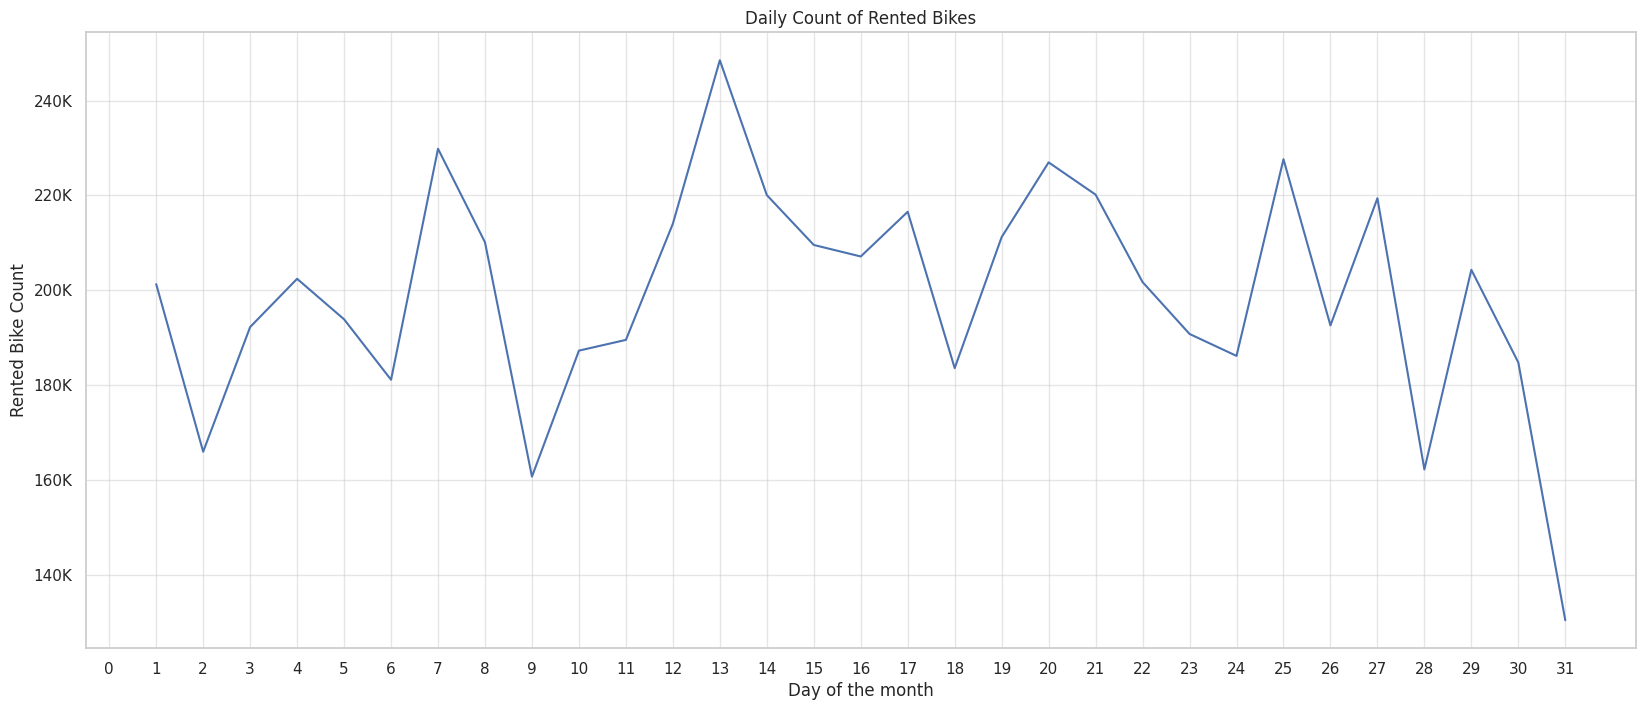

In [ ]:
# Visualizing the table

bike_daily.plot(figsize=(20, 8), legend=None)
plt.xticks(range(32))
plt.xlabel('Day of the month')
plt.ylabel('Rented Bike Count')
plt.title('Daily Count of Rented Bikes')
plt.yticks([140000, 160000, 180000, 200000, 220000, 240000], ['140K', '160K', '180K', '200K', '220K', '240K'])
plt.grid(alpha=0.5)
plt.show()

From the line chart, we can see peaks in the number of rented bikes almost after every 7 days with the maximum at the middle of the month, and minimum at the later parts of the month.

# **5. Feature Engineering**

## **5.1. Dropping Less Important Columns**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date,Month,Day,Day of the week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1,Friday


In [ ]:
df = df.drop(['Date', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday', 'Functioning Day', 'date', 'Visibility (10m)'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Rainfall(mm),Snowfall (cm),Month,Day,Day of the week
0,254,0,-5.2,37,2.2,0.0,0.0,12,1,Friday
1,204,1,-5.5,38,0.8,0.0,0.0,12,1,Friday
2,173,2,-6.0,39,1.0,0.0,0.0,12,1,Friday
3,107,3,-6.2,40,0.9,0.0,0.0,12,1,Friday
4,78,4,-6.0,36,2.3,0.0,0.0,12,1,Friday


## **5.2. Combining Rainfall & Snowfall Columns**

In [ ]:
df['Precipitation (mm)'] = df['Rainfall(mm)'] + 10 * df['Snowfall (cm)']
df = df.drop(['Rainfall(mm)', 'Snowfall (cm)'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Month,Day,Day of the week,Precipitation (mm)
0,254,0,-5.2,37,2.2,12,1,Friday,0.0
1,204,1,-5.5,38,0.8,12,1,Friday,0.0
2,173,2,-6.0,39,1.0,12,1,Friday,0.0
3,107,3,-6.2,40,0.9,12,1,Friday,0.0
4,78,4,-6.0,36,2.3,12,1,Friday,0.0


## **5.3. Encoding the 'day' column**

In [ ]:
def encode(x):
  day = {
      'Monday': 1,
      'Tuesday': 2,
      'Wednesday': 3,
      'Thursday': 4,
      'Friday': 5,
      'Saturday': 6,
      'Sunday': 7
  }

  return day[x]

In [ ]:
df['Day of the week'] = df['Day of the week'].apply(lambda x: encode(x))
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Month,Day,Day of the week,Precipitation (mm)
0,254,0,-5.2,37,2.2,12,1,5,0.0
1,204,1,-5.5,38,0.8,12,1,5,0.0
2,173,2,-6.0,39,1.0,12,1,5,0.0
3,107,3,-6.2,40,0.9,12,1,5,0.0
4,78,4,-6.0,36,2.3,12,1,5,0.0


## **5.4. Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **6. Model Building (Hourly Predictions)**

## **6.1. Creating a Metrics Function**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
def metrics(y_pred):
  print("The evaluation metrics are as follows:")

  # Mean squared error for test set
  MSE  = mean_squared_error(y_test,y_pred)      
  print("MSE :" , MSE)
  
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  # R2 score for prediction on test set
  r2_test = r2_score(y_test,y_pred)             
  print("R2 :" ,r2_test)
  
  # Adjusted r2 score for test set
  a_r2_test = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     
  print("Adjusted R2 :",a_r2_test)

## **6.2. Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=25, min_samples_split=2, min_samples_leaf=2)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_estimators=300)

In [ ]:
# Predicting the value of the dependent variable for train and test dataset
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
metrics(y_test_predict)

The evaluation metrics are as follows:
MSE : 59837.37305891371
RMSE : 244.6167881788037
R2 : 0.8539804350086431
Adjusted R2 : 0.8535344035004603


## **6.3. XGBoost Regressor**

In [ ]:
import xgboost as xgb
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 300
}
xgb_reg = xgb.XGBRegressor(**params)
xgb_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
y_test_predict = xgb_reg.predict(X_test)
metrics(y_test_predict)

The evaluation metrics are as follows:
MSE : 42442.71616270554
RMSE : 206.01630072085447
R2 : 0.896428157950248
Adjusted R2 : 0.8961117872987023


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'objective': ['reg:squarederror'],
    'colsample_bytree': [0.8],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'alpha': [10],
    'n_estimators': [100, 200, 300]
}

xgb_reg = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xgb_params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_test_predict = best_model.predict(X_test)

In [ ]:
metrics(y_test_predict)

The evaluation metrics are as follows:
MSE : 35751.321606632715
RMSE : 189.08019887506126
R2 : 0.9127569917929585
Adjusted R2 : 0.9124904992134792


**XGBoost Regressor is giving the best performance with RMSE of 189 and R2 value of 0.91. I will dump this as a pickle file.**

In [ ]:
import pickle
filename = '/content/drive/MyDrive/XGBoost.pkl'

with open(filename, 'wb') as f:
  pickle.dump(best_model, f)